# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [19]:
!pip install tweepy==4.6.0

    100% |████████████████████████████████| 71kB 4.9MB/s ta 0:00:011
    100% |████████████████████████████████| 153kB 8.6MB/s ta 0:00:01
    100% |████████████████████████████████| 71kB 16.7MB/s ta 0:00:01
  Found existing installation: oauthlib 2.0.6
    Uninstalling oauthlib-2.0.6:
      Successfully uninstalled oauthlib-2.0.6
  Found existing installation: requests 2.18.4
    Uninstalling requests-2.18.4:
      Successfully uninstalled requests-2.18.4
  Found existing installation: requests-oauthlib 0.8.0
    Uninstalling requests-oauthlib-0.8.0:
      Successfully uninstalled requests-oauthlib-0.8.0
  Found existing installation: tweepy 3.5.0
    Uninstalling tweepy-3.5.0:
      Successfully uninstalled tweepy-3.5.0


In [1]:
import pandas as pd
import requests
import os
import json

In [2]:
# read the downloaded
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
folder_name = 'image_prediction'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:
# to make the request to download the file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [5]:
# save the file
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
          file.write(response.content)

In [6]:
os.listdir(folder_name)

['image-predictions.tsv']

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
import tweepy

In [8]:
print(tweepy.__version__)

4.6.0


In [119]:
# Below keys have been hidden.

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth)

In [10]:
client = tweepy.Client(bearer_token = bearer_token,
                       consumer_key = consumer_key, 
                       consumer_secret = consumer_secret, 
                       access_token = access_token, 
                       access_token_secret = access_secret,
                       wait_on_rate_limit = True)

In [11]:
client.get_me()

Response(data=<User id=1512559383661539328 name=Mark Lam username=markzii11>, includes={}, errors=[], meta={})

In [12]:
# create a folder that contains the json file.
folder_name_1 = 'tweet_status'
if not os.path.exists(folder_name_1):
    os.makedirs(folder_name_1)

In [14]:
tweet_ids = df_archive['tweet_id'].values

In [13]:
df_archive.shape

(2356, 17)

In [ ]:
tweet_fields = ['created_at', 'id', 'public_metrics', 'source', 'text']
count = 0

with open(os.path.join(folder_name_1, 'tweet_json.txt'), 'w') as outfile:

    #loop through each tweet_id
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        # store tweet_id
        tweet_data = {}
        tweet_data['tweet_id'] = str(tweet_id)
        
        try:
            # .get_tweet query
            tweet = client.get_tweet(tweet_id, tweet_fields = tweet_fields)
            if tweet.data:
                if tweet.data.get('public_metrics'):
                    for key, value in tweet.data['public_metrics'].items():
                        tweet_data[key] = value
            json.dump(tweet_data, outfile)
            outfile.write('\n')

        except Exception as e:
            print('fail:', e)
        

1: 892420643555336193
2: 892177421306343426
3: 891815181378084864
4: 891689557279858688
5: 891327558926688256
6: 891087950875897856
7: 890971913173991426
8: 890729181411237888
9: 890609185150312448
10: 890240255349198849
11: 890006608113172480
12: 889880896479866881
13: 889665388333682689
14: 889638837579907072
15: 889531135344209921
16: 889278841981685760
17: 888917238123831296
18: 888804989199671297
19: 888554962724278272
20: 888202515573088257
21: 888078434458587136
22: 887705289381826560
23: 887517139158093824
24: 887473957103951883
25: 887343217045368832
26: 887101392804085760
27: 886983233522544640
28: 886736880519319552
29: 886680336477933568
30: 886366144734445568
31: 886267009285017600
32: 886258384151887873
33: 886054160059072513
34: 885984800019947520
35: 885528943205470208
36: 885518971528720385
37: 885311592912609280
38: 885167619883638784
39: 884925521741709313
40: 884876753390489601
41: 884562892145688576
42: 884441805382717440
43: 884247878851493888
44: 8841626705843773

Rate limit exceeded. Sleeping for 535 seconds.


120: 869772420881756160
121: 869702957897576449
122: 869596645499047938
123: 869227993411051520
124: 868880397819494401
125: 868639477480148993
126: 868622495443632128
127: 868552278524837888
128: 867900495410671616
129: 867774946302451713
130: 867421006826221569
131: 867072653475098625
132: 867051520902168576
133: 866816280283807744
134: 866720684873056260
135: 866686824827068416
136: 866450705531457537
137: 866334964761202691
138: 866094527597207552
139: 865718153858494464
140: 865359393868664832
141: 865006731092295680
142: 864873206498414592
143: 864279568663928832
144: 864197398364647424
145: 863907417377173506
146: 863553081350529029
147: 863471782782697472
148: 863432100342583297
149: 863427515083354112
150: 863079547188785154
151: 863062471531167744
152: 862831371563274240
153: 862722525377298433
154: 862457590147678208
155: 862096992088072192
156: 861769973181624320
157: 861383897657036800
158: 861288531465048066
159: 861005113778896900
160: 860981674716409858
161: 86092403599

Rate limit exceeded. Sleeping for 877 seconds.


420: 822244816520155136
421: 822163064745328640
422: 821886076407029760
423: 821813639212650496
424: 821765923262631936
425: 821522889702862852
426: 821421320206483457
427: 821407182352777218
428: 821153421864615936
429: 821149554670182400
430: 821107785811234820
431: 821044531881721856
432: 820837357901512704
433: 820749716845686786
434: 820690176645140481
435: 820494788566847489
436: 820446719150292993
437: 820314633777061888
438: 820078625395449857
439: 820013781606658049
440: 819952236453363712
441: 819924195358416896
442: 819711362133872643
443: 819588359383371776
444: 819347104292290561
445: 819238181065359361
446: 819227688460238848
447: 819015337530290176
448: 819015331746349057
449: 819006400881917954
450: 819004803107983360
451: 818646164899774465
452: 818627210458333184
453: 818614493328580609
454: 818588835076603904
455: 818536468981415936
456: 818307523543449600
457: 818259473185828864
458: 818145370475810820
459: 817908911860748288
460: 817827839487737858
461: 81777768676

Rate limit exceeded. Sleeping for 874 seconds.


721: 783347506784731136
722: 783334639985389568
723: 783085703974514689
724: 782969140009107456
725: 782747134529531904
726: 782722598790725632
727: 782598640137187329
728: 782305867769217024
729: 782021823840026624
730: 781955203444699136
731: 781661882474196992
732: 781655249211752448
733: 781524693396357120
734: 781308096455073793
735: 781251288990355457
736: 781163403222056960
737: 780931614150983680
738: 780858289093574656
739: 780800785462489090
740: 780601303617732608
741: 780543529827336192
742: 780496263422808064
743: 780476555013349377
744: 780459368902959104
745: 780192070812196864
746: 780092040432480260
747: 780074436359819264
748: 779834332596887552
749: 779377524342161408
750: 779124354206535695
751: 779123168116150273
752: 779056095788752897
753: 778990705243029504
754: 778774459159379968
755: 778764940568104960
756: 778748913645780993
757: 778650543019483137
758: 778624900596654080
759: 778408200802557953
760: 778396591732486144
761: 778383385161035776
762: 77828681018

Rate limit exceeded. Sleeping for 876 seconds.


1019: 746818907684614144
1020: 746790600704425984
1021: 746757706116112384
1022: 746726898085036033
1023: 746542875601690625
1024: 746521445350707200
1025: 746507379341139972
1026: 746369468511756288
1027: 746131877086527488
1028: 746056683365994496
1029: 745789745784041472
1030: 745712589599014916
1031: 745433870967832576
1032: 745422732645535745
1033: 745314880350101504
1034: 745074613265149952
1035: 745057283344719872
1036: 744995568523612160
1037: 744971049620602880
1038: 744709971296780288
1039: 744334592493166593
1040: 744234799360020481
1041: 744223424764059648
1042: 743980027717509120
1043: 743895849529389061
1044: 743835915802583040
1045: 743609206067040256
1046: 743595368194129920
1047: 743545585370791937
1048: 743510151680958465
1049: 743253157753532416
1050: 743222593470234624
1051: 743210557239623680
1052: 742534281772302336
1053: 742528092657332225
1054: 742465774154047488
1055: 742423170473463808
1056: 742385895052087300
1057: 742161199639494656
1058: 742150209887731712


Rate limit exceeded. Sleeping for 876 seconds.


1319: 706538006853918722
1320: 706516534877929472
1321: 706346369204748288
1322: 706310011488698368
1323: 706291001778950144
1324: 706265994973601792
1325: 706169069255446529
1326: 706166467411222528
1327: 706153300320784384
1328: 705975130514706432
1329: 705970349788291072
1330: 705898680587526145
1331: 705786532653883392
1332: 705591895322394625
1333: 705475953783398401
1334: 705442520700944385
1335: 705428427625635840
1336: 705239209544720384
1337: 705223444686888960
1338: 705102439679201280
1339: 705066031337840642
1340: 704871453724954624
1341: 704859558691414016
1342: 704847917308362754
1343: 704819833553219584
1344: 704761120771465216
1345: 704499785726889984
1346: 704491224099647488
1347: 704480331685040129
1348: 704364645503647744
1349: 704347321748819968
1350: 704134088924532736
1351: 704113298707505153
1352: 704054845121142784
1353: 703774238772166656
1354: 703769065844768768
1355: 703631701117943808
1356: 703611486317502464
1357: 703425003149250560
1358: 703407252292673536


Rate limit exceeded. Sleeping for 873 seconds.


1621: 684940049151070208
1622: 684926975086034944
1623: 684914660081053696
1624: 684902183876321280
1625: 684880619965411328
1626: 684830982659280897
1627: 684800227459624960
1628: 684594889858887680
1629: 684588130326986752
1630: 684567543613382656
1631: 684538444857667585
1632: 684481074559381504
1633: 684460069371654144
1634: 684241637099323392
1635: 684225744407494656
1636: 684222868335505415
1637: 684200372118904832
1638: 684195085588783105
1639: 684188786104872960
1640: 684177701129875456
1641: 684147889187209216
1642: 684122891630342144
1643: 684097758874210310
1644: 683857920510050305
1645: 683852578183077888
1646: 683849932751646720
1647: 683834909291606017
1648: 683828599284170753
1649: 683773439333797890
1650: 683742671509258241
1651: 683515932363329536
1652: 683498322573824003
1653: 683481228088049664
1654: 683462770029932544
1655: 683449695444799489
1656: 683391852557561860
1657: 683357973142474752
1658: 683142553609318400
1659: 683111407806746624
1660: 683098815881154561


Rate limit exceeded. Sleeping for 875 seconds.


1919: 674271431610523648
1920: 674269164442398721
1921: 674265582246694913
1922: 674262580978937856
1923: 674255168825880576
1924: 674082852460433408
1925: 674075285688614912
1926: 674063288070742018
1927: 674053186244734976
1928: 674051556661161984
1929: 674045139690631169
1930: 674042553264685056
1931: 674038233588723717
1932: 674036086168010753
1933: 674024893172875264
1934: 674019345211760640
1935: 674014384960745472
1936: 674008982932058114
1937: 673956914389192708
1938: 673919437611909120
1939: 673906403526995968
1940: 673887867907739649
1941: 673716320723169284
1942: 673715861853720576
1943: 673711475735838725
1944: 673709992831262724
1945: 673708611235921920
1946: 673707060090052608
1947: 673705679337693185
1948: 673700254269775872
1949: 673697980713705472
1950: 673689733134946305
1951: 673688752737402881
1952: 673686845050527744
1953: 673680198160809984
1954: 673662677122719744
1955: 673656262056419329
1956: 673636718965334016
1957: 673612854080196609
1958: 673583129559498752


Rate limit exceeded. Sleeping for 874 seconds.


2219: 668507509523615744
2220: 668496999348633600


In [3]:
#convert tweet_json.txt to df
df_list = []

In [4]:
with open('tweet_status/tweet_json.txt') as file_1:
    lines = file_1.read().split('\n')
    for ind, line in enumerate(lines):
        try:
            ind_tweet = json.loads(line)
            df_list.append(ind_tweet)
        except Exception as e:
            print(ind, line, e)
        

2356  Expecting value: line 1 column 1 (char 0)


In [5]:
df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'reply_count', 'like_count', 'quote_count'])

In [6]:
df_image = pd.read_csv('image_prediction/image-predictions.tsv', sep = '\t')

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [8]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [74]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 5 columns):
tweet_id         2356 non-null object
retweet_count    2327 non-null float64
reply_count      2327 non-null float64
like_count       2327 non-null float64
quote_count      2327 non-null float64
dtypes: float64(4), object(1)
memory usage: 92.1+ KB


In [85]:
df_archive['retweeted_status_id'].value_counts()

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
8.780576e+17    1
7.320056e+17    1
7.186315e+17    1
6.732953e+17    1
7.914070e+17    1
8.447048e+17    1
7.862340e+17    1
8.685523e+17    1
7.504293e+17    1
8.327664e+17    1
6.690004e+17    1
6.873173e+17    1
7.638376e+17    1
7.815247e+17    1
8.092201e+17    1
8.000650e+17    1
8.174239e+17    1
8.001414e+17    1
7.909461e+17    1
7.867091e+17    1
8.406323e+17    1
8.688804e+17    1
7.869631e+17    1
7.733088e+17    1
8.222448e+17    1
               ..
6.816941e+17    1
7.899865e+17    1
7.939622e+17    1
6.800555e+17    1
7.128090e+17    1
8.164506e+17    1
6.769365e+17    1
6.675487e+17    1
8.083449e+17    1
7.626999e+17    1
6.678667e+17    1
8.479710e+17    1
6.820881e+17    1
8.352641e+17    1
7.761133e+17    1
7.902771e+17    1
6.675484e+17    1
7.677549e+17    1
8.782815e+17    1
8.663350e+17    1
7.399792e+17    1
7.403732e+17    1
8.395493e+17    1
7.001438e+17    1
8.482894e+

In [84]:
df_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [96]:
df.query('retweet_count == "NaN"')

,tweet_id,retweet_count,reply_count,like_count,quote_count
19,888202515573088257,NaN,NaN,NaN,NaN
95,873697596434513921,NaN,NaN,NaN,NaN
101,872668790621863937,NaN,NaN,NaN,NaN
104,872261713294495745,NaN,NaN,NaN,NaN
118,869988702071779329,NaN,NaN,NaN,NaN
132,866816280283807744,NaN,NaN,NaN,NaN
155,861769973181624320,NaN,NaN,NaN,NaN
182,856602993587888130,NaN,NaN,NaN,NaN
185,856330835276025856,NaN,NaN,NaN,NaN
211,851953902622658560,NaN,NaN,NaN,NaN


In [99]:
df_archive.query('in_reply_to_status_id != "NaN"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


### Quality issues
1. In df_archive, timestamp and retweeted_status_timestamp are in object (string) type. It should be in datetime type.

2. In all three dataframes, tweet_id should be in str type

3. In df_archive, some tweets from df_archive are retweets. They should be removed from the dataframe.

4. In df_archive, after removing tweets that are retweets, the columns "retweeted_status_id", "retweeted_status_user_id" and "retweeted_status_timestamp" don't provide any useful information. So they can be removed.

5. In df_archive, some rating denominators are not 10, which will make any analysis unfair.

6. In df_public, some rows don't contain any useful data, as they have "NaN" for all columns.

7. In df_public, retweet_count, reply_count, like_count and quote_count are in float type. They should be in int type.

8. In df_archive, out of 2153 entries, the columns of 'in_reply_to_status_id' and 'in_reply_to_user_id' consists of 2080 rows of "NaN", so we believe it provides limited information on our analysis, hence should be removed.

### Tidiness issues
1. All data from three dataframes should be merged to become a master dataframe, as they share some common information.

2. In the master dataframe, the columns "doggo", "floofer", "pupper", and "puppo" are referring to the same information, and they should be grouped into one column.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [9]:
# Make copies of original pieces of data
df_public_1 = df.copy()
df_archive_1 = df_archive.copy()
df_image_1 = df_image.copy()


### Quality Issues

### Issue #1:

#### Define: In df_archive, timestamp and retweeted_status_timestamp should be in datetime type. 


#### Code

In [10]:
df_archive_1['timestamp'] = pd.to_datetime(df_archive_1['timestamp'])

In [11]:
df_archive_1['retweeted_status_timestamp'] = pd.to_datetime(df_archive_1['retweeted_status_timestamp'])

#### Test

In [12]:
df_archive_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime

### Issue #2:

#### Define: In df_public, tweet_id should be in int type

#### Code

In [15]:
df_public_1['tweet_id'] = df_public_1['tweet_id'].astype(str)
df_archive_1['tweet_id'] = df_archive_1['tweet_id'].astype(str)
df_image_1['tweet_id'] = df_image_1['tweet_id'].astype(str)

#### Test

In [16]:
df_public_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 5 columns):
tweet_id         2356 non-null object
retweet_count    2327 non-null float64
reply_count      2327 non-null float64
like_count       2327 non-null float64
quote_count      2327 non-null float64
dtypes: float64(4), object(1)
memory usage: 92.1+ KB


In [17]:
df_image_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [18]:
df_archive_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetim

### Issue #3:

#### Define: Some tweets from df_archive are retweets. They should be removed from the dataframe.



#### Code: 

In [19]:
rt_index = df_archive_1.query('retweeted_status_id != "NaN"').index

In [20]:
rt_index

Int64Index([  19,   32,   36,   68,   73,   74,   78,   91,   95,   97,
            ...
             926,  937,  943,  949, 1012, 1023, 1043, 1242, 2259, 2260],
           dtype='int64', length=181)

In [21]:
df_archive_1 = df_archive_1.drop(rt_index, axis = 0)

#### Test

In [22]:
df_archive_1['retweeted_status_id'].value_counts(dropna = False)

NaN    2175
Name: retweeted_status_id, dtype: int64

### Issue #4:

#### Define: After removing tweets that are retweets, the columns "retweeted_status_id", "retweeted_status_user_id" and "retweeted_status_timestamp" don't provide any useful information. So they can be removed.


#### Code: 

In [23]:
rt_column = ['retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp']

In [24]:
df_archive_1 = df_archive_1.drop(rt_column, axis = 1)

#### Test


In [25]:
df_archive_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(9)
memory usage: 254.9+ KB


### Issue #5:

#### Define: Some rating denominators are not 10, which will make any analysis unfair.



#### Code

In [26]:
df_archive_1['rating_denominator'].value_counts()

10     2153
50        3
80        2
11        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [27]:
wrong_score_index = df_archive_1.query('rating_denominator != 10').index

In [28]:
df_archive_1 = df_archive_1.drop(wrong_score_index, axis = 0)

#### Test

In [29]:
df_archive_1.query('rating_denominator == 50')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [30]:
df_archive_1.query('rating_denominator == 170')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #6:

#### Define: In df_public, some rows don't contain any useful data, as they have "NaN" for all columns.

#### Code

In [31]:
public_useless_index = df_public_1.query('retweet_count == "NaN"').index

In [32]:
df_public_1 = df_public_1.drop(public_useless_index, axis = 0)

#### Test

In [33]:
df_public_1.query('retweet_count == "NaN" or reply_count == "NaN" or like_count == "NaN" or quote_count == "NaN"')

,tweet_id,retweet_count,reply_count,like_count,quote_count


### Issue #7:

#### Define: In df_public, retweet_count, reply_count, like_count and quote_count are in float type. They should be in int type.


#### Code

In [34]:
df_public_1['retweet_count'] = df_public_1['retweet_count'].astype(int)

In [35]:
df_public_1['reply_count'] = df_public_1['reply_count'].astype(int)

In [36]:
df_public_1['like_count'] = df_public_1['like_count'].astype(int)

In [37]:
df_public_1['quote_count'] = df_public_1['quote_count'].astype(int)

#### Test

In [38]:
df_public_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2327 entries, 0 to 2355
Data columns (total 5 columns):
tweet_id         2327 non-null object
retweet_count    2327 non-null int64
reply_count      2327 non-null int64
like_count       2327 non-null int64
quote_count      2327 non-null int64
dtypes: int64(4), object(1)
memory usage: 109.1+ KB


### Issue #8:

#### Define: In df_archive, out of 2153 entries, the columns of 'in_reply_to_status_id' and 'in_reply_to_user_id' consists of 2080 rows of "NaN", so we believe it provides limited information on our analysis, hence should be removed.

#### Code

In [39]:
df_archive_1.query('in_reply_to_status_id == "NaN"or in_reply_to_user_id == "NaN"').shape[0]

2080

In [40]:
df_archive_1.shape[0]

2153

In [41]:
useless_columns = ['in_reply_to_status_id','in_reply_to_user_id']

In [42]:
df_archive_1 = df_archive_1.drop(useless_columns, axis = 1)

#### Test

In [43]:
df_archive_1.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Tidiness Issues

### Issue #1:

#### Define: All data from three dataframes should be merged to become a master dataframe, as they share some common information.

#### Code

In [44]:
df_dog_rates = df_archive_1.merge(df_public_1, on = 'tweet_id', how = 'left').merge(df_image_1, on = 'tweet_id', how = 'left').sort_index()

#### Test

In [45]:
df_dog_rates.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [46]:
df_dog_rates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2152
Data columns (total 27 columns):
tweet_id              2153 non-null object
timestamp             2153 non-null datetime64[ns]
source                2153 non-null object
text                  2153 non-null object
expanded_urls         2099 non-null object
rating_numerator      2153 non-null int64
rating_denominator    2153 non-null int64
name                  2153 non-null object
doggo                 2153 non-null object
floofer               2153 non-null object
pupper                2153 non-null object
puppo                 2153 non-null object
retweet_count         2145 non-null float64
reply_count           2145 non-null float64
like_count            2145 non-null float64
quote_count           2145 non-null float64
jpg_url               1976 non-null object
img_num               1976 non-null float64
p1                    1976 non-null object
p1_conf               1976 non-null float64
p1_dog               

### Issue #2:

#### Define: In the master dataframe, the columns "doggo", "floofer", "pupper", and "puppo" are referring to the same information, and they should be grouped into one column.

#### Code

In [47]:
df_dog_rates_clean = df_dog_rates.copy()

In [48]:
# take in one row of panda df
def compute_all_none(row):
    array = []
    # for each column interested
    for item in ['doggo', 'floofer', 'pupper', 'puppo']:
        # append whether the value == none
        array.append(row[item] == 'None')
    # any(array) ==> any([True, False, False]) => True
    # all(array) returns True if every item in array is True
    return all(array)

In [49]:
df_dog_rates_clean['all_none'] = df_dog_rates_clean.apply(compute_all_none, axis=1)

In [50]:
df_dog_rates_clean[['doggo','floofer','pupper','puppo','all_none']].head(10)

,doggo,floofer,pupper,puppo,all_none
0,None,None,None,None,True
1,None,None,None,None,True
2,None,None,None,None,True
3,None,None,None,None,True
4,None,None,None,None,True
5,None,None,None,None,True
6,None,None,None,None,True
7,None,None,None,None,True
8,None,None,None,None,True
9,doggo,None,None,None,False


In [51]:
id_vars = ['tweet_id','timestamp','source','text','expanded_urls','rating_numerator','rating_denominator','name','retweet_count','reply_count','like_count','quote_count','jpg_url','img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog','all_none']

In [52]:
df_dog_rates_clean = pd.melt(df_dog_rates_clean, id_vars = id_vars, var_name = 'useless', value_name = 'mentioned')

In [53]:
df_dog_rates_clean = df_dog_rates_clean.drop('useless', axis = 1)

In [54]:
df_dog_rates_clean = df_dog_rates_clean.drop_duplicates()

In [55]:
df_dog_rates_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2509 entries, 0 to 7358
Data columns (total 25 columns):
tweet_id              2509 non-null object
timestamp             2509 non-null datetime64[ns]
source                2509 non-null object
text                  2509 non-null object
expanded_urls         2449 non-null object
rating_numerator      2509 non-null int64
rating_denominator    2509 non-null int64
name                  2509 non-null object
retweet_count         2500 non-null float64
reply_count           2500 non-null float64
like_count            2500 non-null float64
quote_count           2500 non-null float64
jpg_url               2293 non-null object
img_num               2293 non-null float64
p1                    2293 non-null object
p1_conf               2293 non-null float64
p1_dog                2293 non-null object
p2                    2293 non-null object
p2_conf               2293 non-null float64
p2_dog                2293 non-null object
p3                  

In [56]:
false_none_index = df_dog_rates_clean.query('all_none == 0 and mentioned == "None"').index

In [57]:
df_dog_rates_clean = df_dog_rates_clean.drop(false_none_index, axis = 0)

In [58]:
df_dog_rates_clean.head(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,reply_count,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,all_none,mentioned
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,7065.0,144.0,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,True,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,5340.0,172.0,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,True,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,3510.0,110.0,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,True,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,7271.0,142.0,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,True,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,7810.0,193.0,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,True,None
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,2622.0,58.0,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,True,None
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,1684.0,51.0,...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,True,None
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,15881.0,159.0,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,True,None
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,3652.0,94.0,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,True,None
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,6145.0,145.0,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,False,doggo


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [59]:
df_dog_rates_clean.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [60]:
df_v = pd.read_csv('twitter_archive_master.csv')

In [61]:
import matplotlib.pyplot as plt

### Insights:
1. Based on the prediction model, we identify the most frequent dog breeds in the dataset. Golden retriever has been mentioned 139 times, labrador retriver has been mentioned 93 times, and pembroke has been mentioned 88 times.

In [62]:
df_v['p1'].value_counts()

golden_retriever             139
Labrador_retriever            93
Pembroke                      88
Chihuahua                     79
pug                           54
chow                          41
Samoyed                       40
toy_poodle                    38
Pomeranian                    38
malamute                      29
cocker_spaniel                27
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            22
seat_belt                     21
German_shepherd               20
Siberian_husky                19
Staffordshire_bullterrier     19
Shetland_sheepdog             18
Eskimo_dog                    18
teddy                         17
beagle                        17
Maltese_dog                   17
Rottweiler                    17
Shih-Tzu                      17
Cardigan                      17
Lakeland_terrier              16
Italian_greyhound             16
kuvasz                        16
web_site                      15
          

2. As we identified the top 10 frequent dog breeds, we identify the most popular breed by measuring the average like count. Samoyed ranks first with 11573 likes (favourites) for each appearance in a tweet. Golden retriver ranks the second with 10924 likes (favourties) for each appearance in a tweet.

In [63]:
df_dog_like = df_v[['like_count', 'p1']]

In [64]:
df_dog_like['p1'].value_counts()

golden_retriever             139
Labrador_retriever            93
Pembroke                      88
Chihuahua                     79
pug                           54
chow                          41
Samoyed                       40
toy_poodle                    38
Pomeranian                    38
malamute                      29
cocker_spaniel                27
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            22
seat_belt                     21
German_shepherd               20
Siberian_husky                19
Staffordshire_bullterrier     19
Shetland_sheepdog             18
Eskimo_dog                    18
teddy                         17
beagle                        17
Maltese_dog                   17
Rottweiler                    17
Shih-Tzu                      17
Cardigan                      17
Lakeland_terrier              16
Italian_greyhound             16
kuvasz                        16
web_site                      15
          

In [65]:
df_popular = df_dog_like.query("p1 == 'golden_retriever' or p1 == 'Labrador_retriever' or p1 == 'Pembroke' or p1 == 'Chihuahua' or p1 == 'pug' or p1 =='chow' or p1 == 'Samoyed' or p1 =='toy_poodle' or p1 == 'Pomeranian' or p1 =='malamute'")

In [66]:
df_popular_like = df_popular.groupby(['p1']).mean().sort_values(['like_count'], ascending = False)

In [67]:
df_popular_like

,like_count
p1,
Samoyed,11573.461538
golden_retriever,10924.215827
Labrador_retriever,10156.633333
Pembroke,9938.318182
chow,8691.121951
Chihuahua,7635.367089
malamute,7539.000000
Pomeranian,7014.315789
toy_poodle,5501.432432


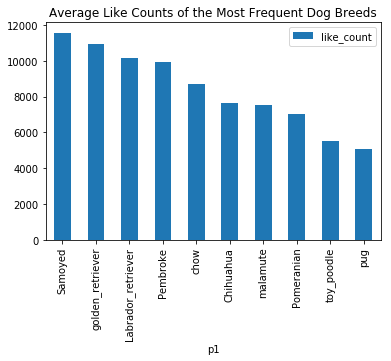

In [68]:
df_popular_like.plot(kind = 'bar', title = 'Average Like Counts of the Most Frequent Dog Breeds');

3. Retweet_count and like_count have a very positive correlation (0.926). It tells that the two variables tend to move in the same direction, one variable would increase as the other increases, and would decrease as the other decreases.

In [69]:
df_retweet = df_v['retweet_count']

In [70]:
df_like = df_v['like_count']

In [71]:
correlation = df_retweet.corr(df_like)

In [72]:
correlation

0.92630096832353792

Text(0,0.5,'Retweet Count')

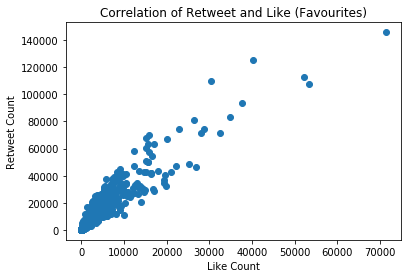

In [73]:
plt.scatter(df_retweet, df_like)
plt.title('Correlation of Retweet and Like (Favourites)')
plt.xlabel('Like Count')
plt.ylabel('Retweet Count')

### Visualization

#### Please refer to the diagrams in the insights section.